In [46]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

import brutefit as bf
from sklearn.preprocessing import StandardScaler

from uncertainties import unumpy as unp
from b_funks import load

nom = unp.nominal_values
err = unp.std_devs

plt.rcParams['figure.dpi'] = 150

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
odat = load.b_data(None)
dat = load.b_data()

## Scale variables to natural variability 

Pre-scale all variables to 'natural variability' mean and variance so that parameter values denote the 'importance' of each parameter in interpreting natural systems.

In [3]:
nvars = {
    ('Measured', 'Temp'): (21, 5),
    ('Measured', 'Salinity'): (35, 3),
    ('Measured', '[Mg]sw'): (50.5, 10),
    ('Measured', '[Ca]sw'): (10.2, 3),
    ('csys_mid', 'DIC'): (2052.3, 315.51),  # median and 95% CI from top 50m of GLODAP bottle measurements
    ('csys_mid', 'CO3'): (171.3843481179095, 185.0449356225493),
    ('csys_mid', 'pHtot'): (8.090956765499575, 0.32920853921891347),
    ('csys_mid', 'Omega'): (4.054968518549813, 4.379451755015093),
    ('csys_mid', 'BO4'): (80.07481670543528, 70.57903101194131),
    ('csys_mid', 'BT'): (409.7020428571429, 98.22753457142858)
}

## Pairs of Parameters:
 - B, DIC
 - **B, HCO3**
 - B, CO3
 - BO4, DIC
 - BO4, HCO3
 - BO4, CO3
 
Extra parameters:
<!--  - Sal -->
<!--  - Temp -->
 - Ca
 - Mg
 - Omega
 - CO3

## Fitting KB (B/DIC)

In [8]:
extras = [
    ('Measured', '[Ca]sw'),
    ('Measured', '[Mg]sw'),
#     ('Measured', 'Temp'),
#     ('csys_mid', 'Omega'),
    ('csys_mid', 'BO4'),
    ('csys_mid', 'BT'),
    ('csys_mid', 'CO3'),
    ('csys_mid', 'pHtot'),
    ('csys_mid', 'DIC'),
#     ('csys_mid', 'del_CO3'),
]

y = nom(dat.loc[:, ('Measured', 'KB')])
w = 1 / err(dat.loc[:, ('Measured', 'KB')])**2
# y = dat.loc[:, ('Measured', 'B/Caf')] / (dat.loc[:, ('csys_mid', 'BT')] / dat.loc[:, ('csys_mid', 'HCO3')])

candidates = dat.loc[:, extras]
kbrutes = bf.Brute(X=candidates.values, y=y, varnames=[c[1] for c in candidates.columns], w=w, max_interaction_order=0, scale_data=True, Scaler=StandardScaler)
df = kbrutes.evaluate_polynomials()

Evaluating Models::   0%|          | 0/128 [00:00<?, ?it/s]

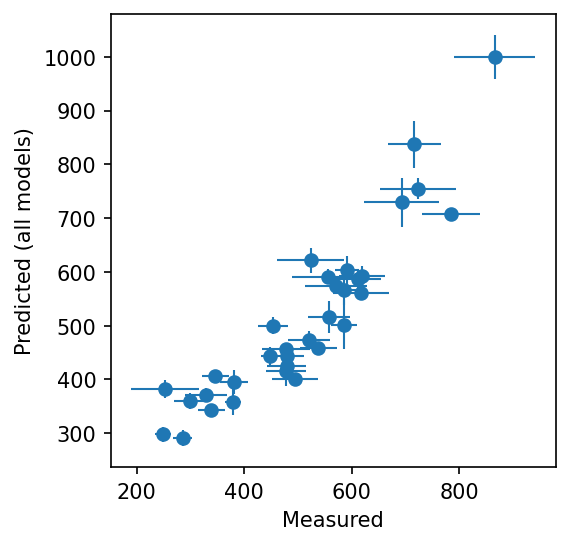

In [9]:
kbrutes.plot_obs_vs_pred()

In [10]:
kbrutes.varnames

['[Ca]sw', '[Mg]sw', 'BO4', 'BT', 'CO3', 'pHtot', 'DIC']

In [11]:
df.head(10)

coefs                                                              \
          C      X0^1      X1^1      X2^1      X3^1      X4^1      X5^1   
0  0.041889       NaN  0.135096       NaN       NaN  0.667455       NaN   
1  0.006510       NaN       NaN       NaN       NaN  0.656246       NaN   
2  0.052063       NaN  0.157574       NaN       NaN  0.372275  0.245877   
3  0.003097  0.137974       NaN       NaN       NaN  0.695960       NaN   
4  0.000202       NaN  0.146399       NaN -0.071780  0.665619       NaN   
5  0.033584  0.087118  0.111612       NaN       NaN  0.690583       NaN   
6  0.028468       NaN  0.146560  0.350209 -0.235405  0.445598       NaN   
7  0.008498       NaN  0.170177       NaN -0.075562  0.361086  0.253587   
8  0.049623       NaN  0.179534       NaN       NaN       NaN  0.502713   
9  0.008124       NaN       NaN       NaN       NaN  0.544385  0.092593   

             p_values            ...                                    \
       X6^1         C      X0^1  ...      X3^1          X4^1      X5^1   
0  0.597479  0.601244       NaN  ...       NaN  9.674461e-09       NaN   
1  0.613766  0.938944       NaN  ...       NaN  4.302583e-08       NaN   
2  0.794788  0.505592       NaN  ...       NaN  5.488463e-02  0.184607   
3  0.606071  0.970166  0.107463  ...       NaN  8.729978e-09       NaN   
4  0.569292  0.997965       NaN  ...  0.375904  8.482747e-09       NaN   
5  0.595452  0.674723  0.315988  ...       NaN  5.030435e-09       NaN   
6  0.730236  0.709492       NaN  ...  0.068857  5.057753e-03       NaN   
7  0.771303  0.911541       NaN  ...  0.335886  5.763383e-02  0.164066   
8  1.042145  0.557828       NaN  ...       NaN           NaN  0.000003   
9  0.689089  0.924100       NaN  ...       NaN  1.052455e-02  0.631027   

                  metrics                                                 \
           X6^1        R2           BF0 n_covariates    BF_max         K   
0  8.864972e-08  0.817368  1.230169e+08          3.0  1.000000  1.000000   
1  1.586024e-07  0.786706  9.570384e+07          2.0  0.777973  1.285392   
2  4.056863e-06  0.832583  6.534921e+07          4.0  0.531221  1.882454   
3  1.271814e-07  0.804252  4.801445e+07          3.0  0.390308  2.562081   
4  2.163572e-07  0.827559  4.446431e+07          4.0  0.361449  2.766644   
5  1.013732e-07  0.823962  3.398878e+07          4.0  0.276294  3.619339   
6  1.973448e-06  0.845122  3.234903e+07          5.0  0.262964  3.802800   
7  5.321366e-06  0.844488  3.073890e+07          5.0  0.249875  4.001994   
8  2.418066e-13  0.796426  2.824207e+07          3.0  0.229579  4.355803   
9  9.445091e-05  0.792418  2.169854e+07          3.0  0.176387  5.669364   

                                       
                     evidence_against  
0                          Best Model  
1  Not worth more than a bare mention  
2  Not worth more than a bare mention  
3  Not worth more than a bare mention  
4  Not worth more than a bare mention  
5         Substantially less probably  
6         Substantially less probably  
7         Substantially less probably  
8         Substantially less probably  
9         Substantially less probably  

[10 rows x 22 columns]

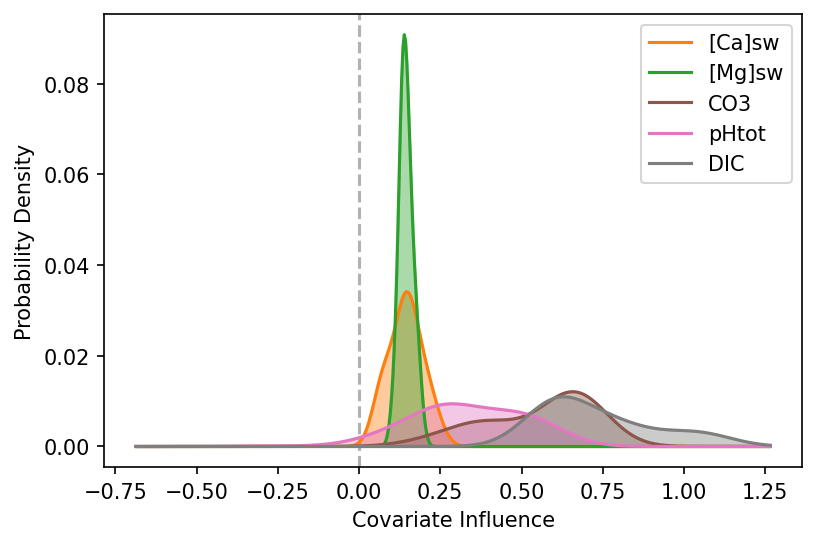

In [12]:
kbrutes.plot_param_dists(filter_zeros=0.05)
plt.legend()

## Fitting KB (denominator agnosticator)

Scaling [BO4] doesn't respec chaing [B]... wut 2 doo?

In [17]:
denominators = {}
KBs = {}
y = dat.loc[:, ('Measured', 'B/Caf')]
for b in ['BT', 'BO4']:
    for c in ['DIC', 'HCO3', 'CO3']:
        ratio = f'{b}_{c}'
        denominators[ratio] = (dat.loc[:, ('csys_mid', b)] / dat.loc[:, ('csys_mid', c)])
        KBs[ratio] = y / denominators[ratio]

ratio = 'BO4_sqrt(CO3)'
denominators[ratio] = (dat.loc[:, ('csys_mid', 'BO4')] / dat.loc[:, ('csys_mid', 'CO3')]**0.5)
KBs[ratio] = y / denominators[ratio]

# Andy logic
ratio = 'BO4_(CO3*sqrt(Ca))'
denominators[ratio] = (dat.loc[:, ('csys_mid', 'BO4')] / (dat.loc[:, ('csys_mid', 'CO3')] * dat.loc[:, ('Measured', '[Ca]sw')]**0.5))
KBs[ratio] = y / denominators[ratio]

ratio = 'BO4_(HCO3*sqrt(Ca))'
denominators[ratio] = (dat.loc[:, ('csys_mid', 'BO4')] / (dat.loc[:, ('csys_mid', 'HCO3')] * dat.loc[:, ('Measured', '[Ca]sw')]**0.5))
KBs[ratio] = y / denominators[ratio]

denominators['sal'] = dat.loc[:, ('Measured', 'Salinity')]

In [61]:
csys_var = 'csys_mid'

extras = [
    ('Measured', '[Ca]sw'),
    ('Measured', '[Mg]sw'),
#     ('Measured', 'Temp'),
#     (csys_var, 'Omega'),
    (csys_var, 'BO4'),
    (csys_var, 'BT'),
    (csys_var, 'CO3'),
    (csys_var, 'pHtot'),
    (csys_var, 'DIC'),
#     (csys_var, 'del_CO3'),
]

brutes = {}

exclude_denominator = False
exclude_numerator = False

y0 = dat.loc[:, ('Measured', 'B/Caf')]

for b in ['BT', 'BO4']:
    iextras = extras
    if exclude_numerator:
        iextras = [e for e in iextras if e[1] != b]
    for c in ['DIC', 'HCO3', 'CO3']:
        if b == 'BT' and c == 'CO3':
            continue
        if exclude_denominator:
            iextras = [e for e in iextras if e[1] != c]
        ratio = f'{b}_{c}'
        print(f'KB Denominator: {ratio}')
        candidates = dat.loc[:, iextras]
        yu = y0 / denominators[ratio]
        y = nom(yu)
        w = 1 / err(yu)**2

        brutes[ratio] = bf.Brute(X=candidates.values, y=y, w=w, varnames=[c[1] for c in candidates.columns], max_interaction_order=0, Scaler=StandardScaler)
        _ = brutes[ratio].evaluate_polynomials()
    
# bo4 / sqrt(co3)
ratio = 'BO4_sqrt(CO3)'
b = 'BO4'
c = 'CO3'
iextras = extras
if exclude_denominator:
    iextras = [e for e in iextras if e[1] != c]
if exclude_numerator:
    iextras = [e for e in iextras if e[1] != b]
print(f'KB Denominator: {ratio}')
candidates = dat.loc[:, iextras]
yu = y0 / denominators[ratio]
y = nom(yu)
w = 1 / err(yu)**2
brutes[ratio] = bf.Brute(X=candidates.values, y=y, w=w, varnames=[c[1] for c in candidates.columns], max_interaction_order=0, scale_data=True, Scaler=StandardScaler)
_ = brutes[ratio].evaluate_polynomials()

KB Denominator: BT_DIC


Evaluating Models::   0%|          | 0/128 [00:00<?, ?it/s]

KB Denominator: BT_HCO3


Evaluating Models::   0%|          | 0/128 [00:00<?, ?it/s]

KB Denominator: BO4_DIC


Evaluating Models::   0%|          | 0/128 [00:00<?, ?it/s]

KB Denominator: BO4_HCO3


Evaluating Models::   0%|          | 0/128 [00:00<?, ?it/s]

KB Denominator: BO4_CO3


Evaluating Models::   0%|          | 0/128 [00:00<?, ?it/s]

KB Denominator: BO4_sqrt(CO3)


Evaluating Models::   0%|          | 0/128 [00:00<?, ?it/s]

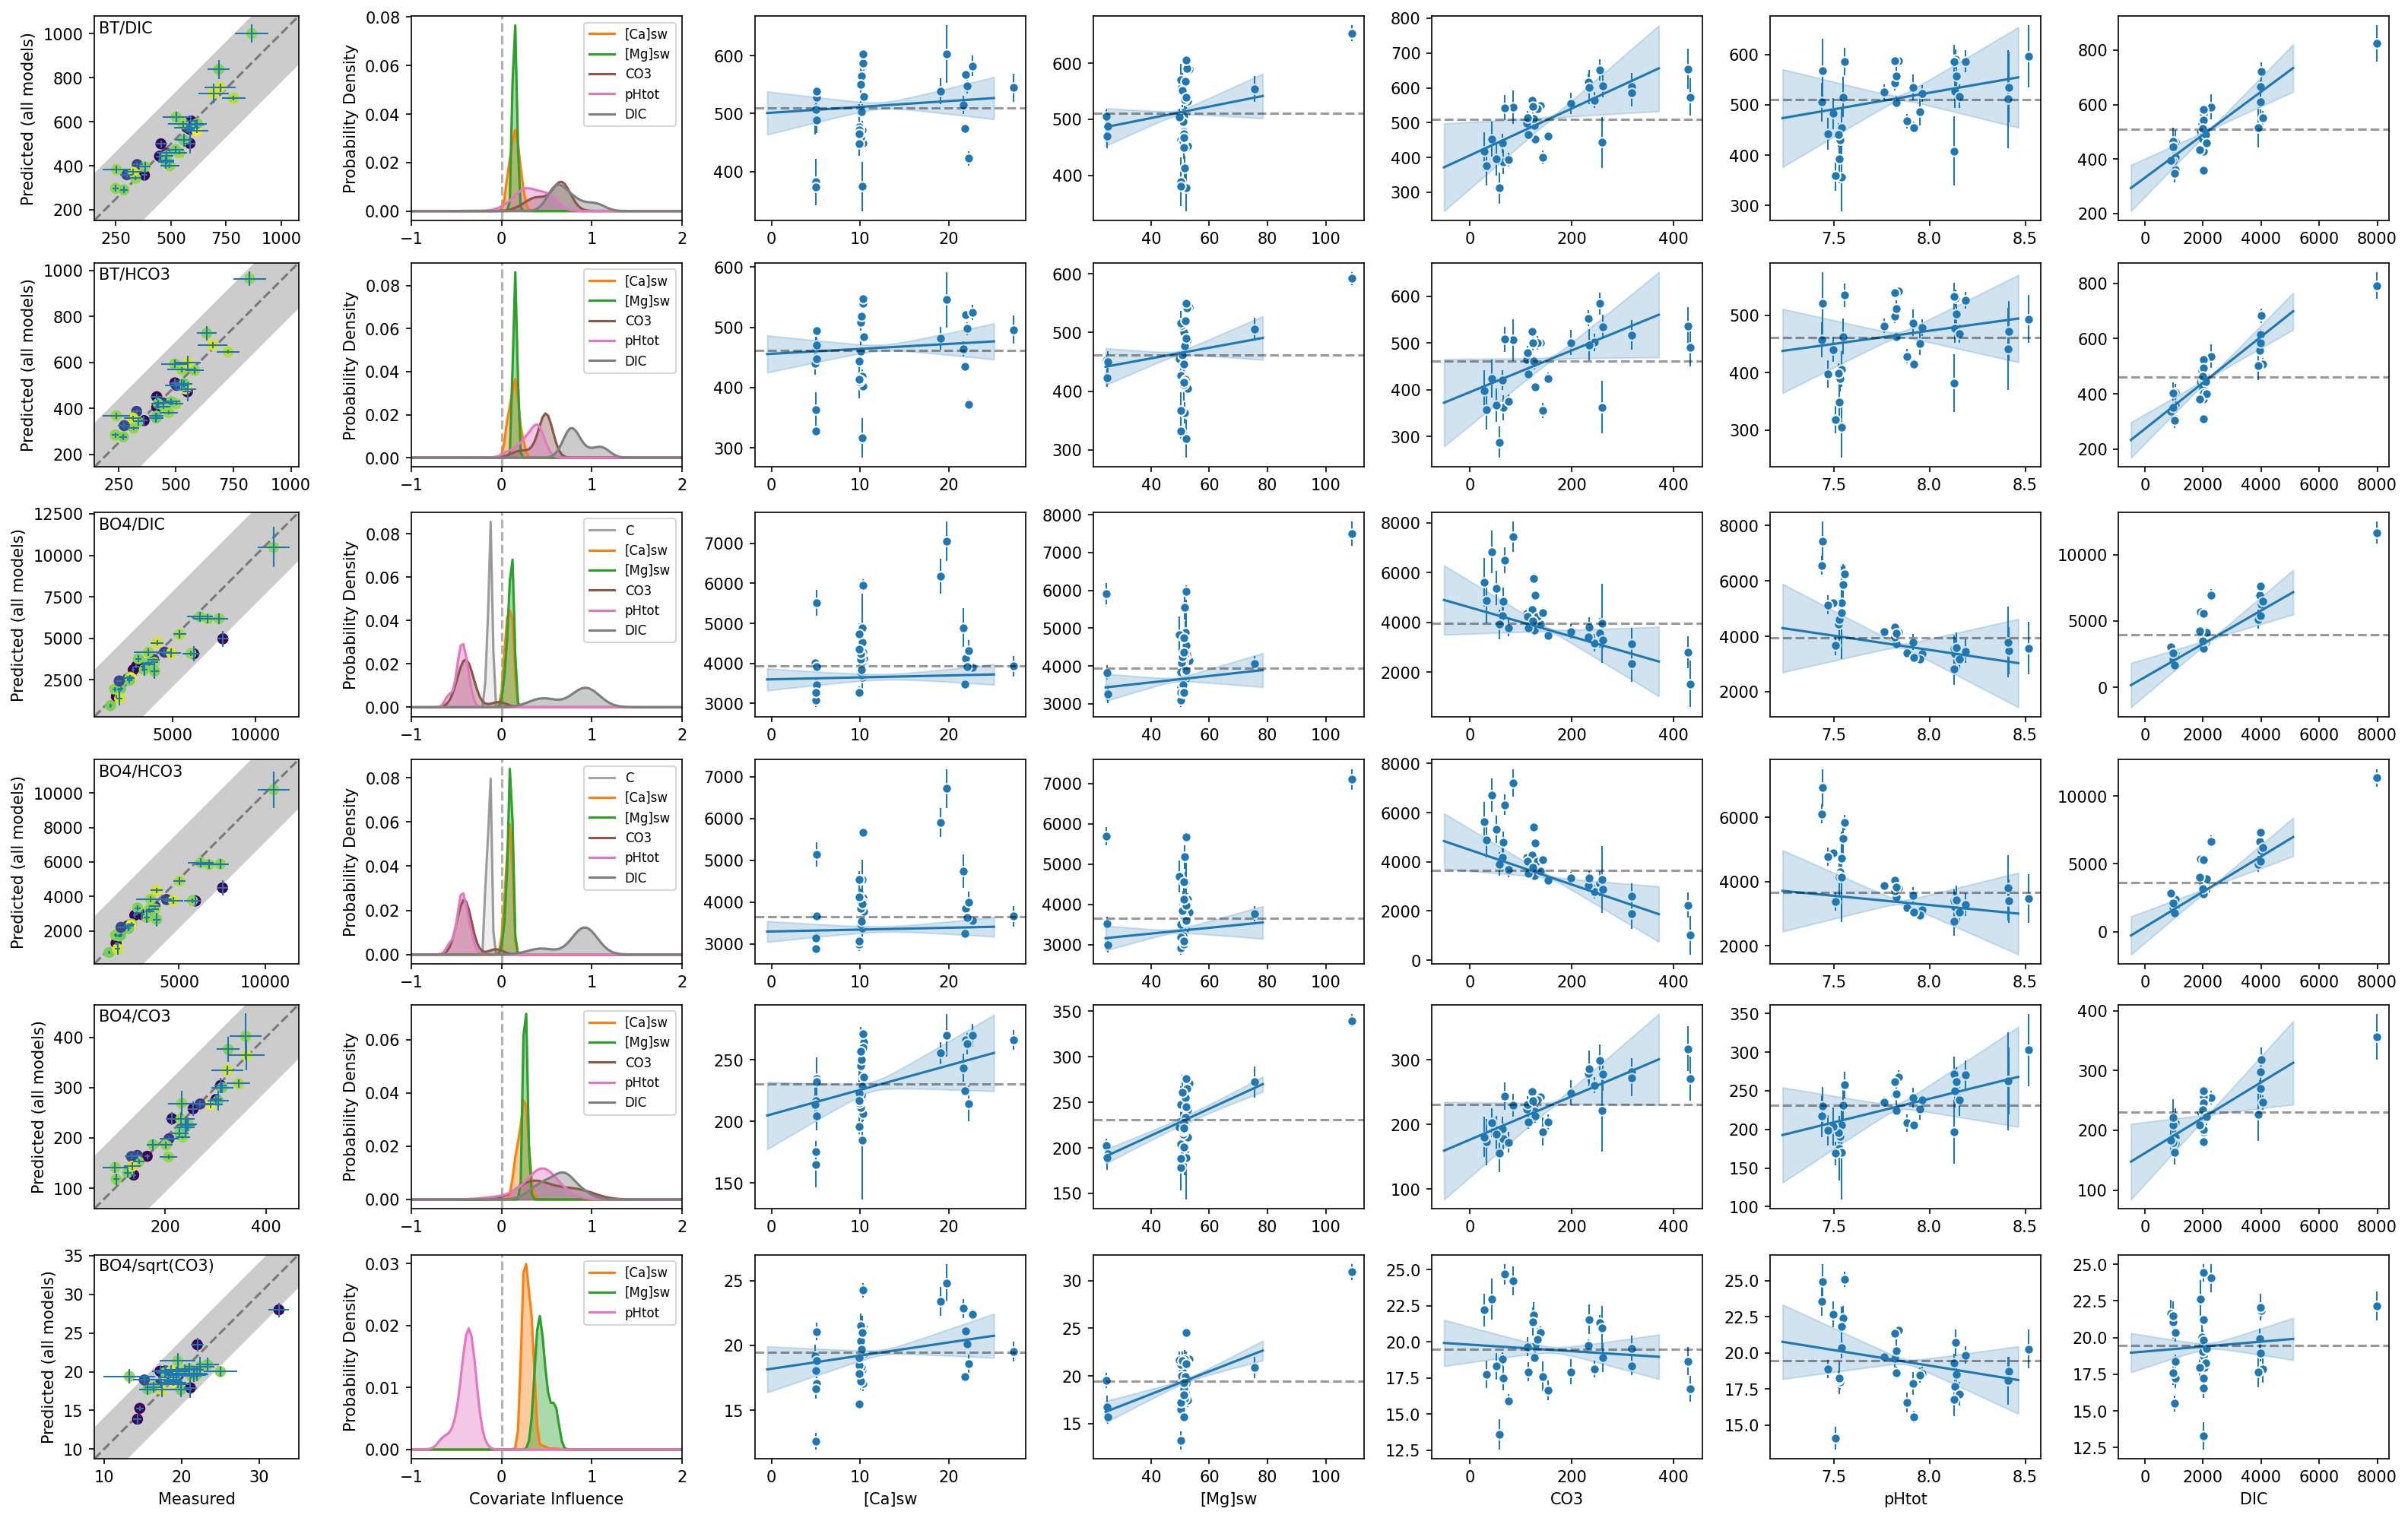

In [62]:
resid_vars = ['[Ca]sw', '[Mg]sw', 'CO3', 'pHtot', 'DIC']

fig, axs = plt.subplots(
    nrows=len(brutes), 
    ncols=2 + len(resid_vars), 
    figsize=[6 + 3 * len(resid_vars), 2.2 * len(brutes)],
#     sharex='col',
#     sharey='col',
    constrained_layout=True)

p_level = 0.05
xlim = -1, 2

for i, k in enumerate(brutes.keys()):
    pax, dax = axs[i, :2]
    b = brutes[k]
    m_CI95 = stats.t.ppf(0.95, df=len(b.y_orig))  # multiplier for 95% confidence interval
    
    b.plot_obs_vs_pred(ax=pax, c=dat.csys_mid.BT)  # c=(1 / b.w)**0.5)
    lim = [min(pax.get_xlim()[0], pax.get_ylim()[0]),
           max(pax.get_xlim()[1], pax.get_ylim()[1])]
    pax.set_xlim(lim)
    pax.set_ylim(lim)
    pax.plot(lim, lim, ls='dashed', color=(0,0,0,0.4), zorder=-1)
    
    best_fit_residual = np.std(b.pred_means - b.y_orig)
    pax.fill_between(lim, lim - best_fit_residual, lim + best_fit_residual, color=(0,0,0,0.2), lw=0, zorder=-3)
    
    b.plot_param_dists(ax=dax, filter_zeros=p_level, xvals=np.linspace(*xlim, 100))
    dax.legend(fontsize=8)
    dax.set_xlim(*xlim)
    
    if not pax.is_last_row():
        pax.set_xlabel(None)
        dax.set_xlabel(None)
    pax.text(0.02, 0.98, k.replace('_','/'), transform=pax.transAxes, ha='left', va='top')
    
    raxs = axs[i, 2:]
    
    ymean = np.mean(b.y_orig)
    for r, ax in zip(resid_vars, raxs):
        
        # calculate new data
        Xind = np.array([v == r for v in b.varnames])

        Xnew = b.X.copy()
        Xnew[:,Xind] = 0
        
        # predict from new data
        b.predict(Xnew, scaled=True)
        
        # plot new data
        ax.scatter(b.X_orig[:, Xind], ymean + b.y_orig[:,0] - b.pred_means, lw=1, edgecolor='w')
        ax.errorbar(b.X_orig[:, Xind], ymean + b.y_orig[:,0] - b.pred_means, yerr=b.pred_stds,
                    lw=0, elinewidth=1, zorder=-2)
        
        # predict line of best fit
        Xnew = np.zeros((50, Xnew.shape[1]))
        Xnew[:, Xind] = np.linspace(-2, 2, 50).reshape(-1,1)
        b.predict(Xnew, scaled=True)
        Xorig = b.X_scaler.inverse_transform(Xnew)
        
        ax.plot(Xorig[:, Xind], b.pred_means, color='C0')
        ax.fill_between(Xorig[:, Xind].reshape(-1), b.pred_means - m_CI95 * b.pred_stds, b.pred_means + m_CI95 * b.pred_stds, alpha=0.2, color='C0')
        ax.axhline(ymean, ls='dashed', color=(0,0,0,0.4))
#         ax.axhspan(ymean - best_fit_residual, ymean + best_fit_residual, color=(0,0,0,0.2), lw=0, zorder=-3)
        
        if ax.is_last_row():
            ax.set_xlabel(r)
        

1.6923603038977453

In [35]:
Xnew.shape

(33, 7)

In [42]:
# aggregate fits
df = []
for r, b in brutes.items():
    tdf = b.modelfits
    tdf['r'] = r
    df.append(tdf)
         
df = pd.concat(df)

# calculate global metrics
df.loc[:, ('metrics', 'BF_max')] = df.loc[:, ('metrics', 'BF0')] / df.loc[:, ('metrics', 'BF0')].max()
df.loc[:, ('metrics', 'K')] = 1 / df.loc[:, ('metrics', 'BF_max')]
df.loc[:, ('metrics', 'evidence_against')] = None

df.sort_values(('metrics', 'K'), inplace=True)
df.reset_index(drop=True, inplace=True)

In [20]:
extras

[('Measured', '[Ca]sw'),
 ('Measured', '[Mg]sw'),
 ('csys_mid', 'BO4'),
 ('csys_mid', 'BT'),
 ('csys_mid', 'CO3'),
 ('csys_mid', 'pHtot'),
 ('csys_mid', 'DIC')]

In [37]:
brutes['BO4_HCO3'].varnames

['[Ca]sw', '[Mg]sw', 'BT', 'CO3', 'pHtot', 'DIC']

In [35]:
brutes['BO4_CO3'].varnames

['[Ca]sw', '[Mg]sw', 'BT', 'pHtot', 'DIC']

In [23]:
df.head(10)

coefs                                                                   \
          C      X0^1      X1^1      X2^1      X3^1      X4^1      X5^1 X6^1   
0  0.261846  0.099654  0.235527       NaN  0.609776  0.142759       NaN  NaN   
1 -0.664378       NaN       NaN       NaN       NaN -0.884304  0.137390  NaN   
2 -0.595482       NaN  0.051426       NaN       NaN -0.838942  0.123750  NaN   
3  0.046224       NaN  0.119150       NaN  0.660150       NaN  0.131925  NaN   
4 -0.664475  0.002831       NaN       NaN       NaN -0.879989  0.137766  NaN   
5  0.265639  0.098450  0.235661 -0.005905  0.608115  0.148306       NaN  NaN   
6 -0.024881       NaN       NaN       NaN  0.610812       NaN  0.170743  NaN   
7 -0.096206  0.065207       NaN       NaN  0.724561       NaN  0.169152  NaN   
8  0.213442       NaN  0.143759       NaN       NaN  0.316062  0.172171  NaN   
9 -0.293381  0.108463       NaN       NaN -1.397636       NaN  0.255089  NaN   

        metrics            ...                   p_values                      \
            BF0    BF_max  ... n_covariates             C      X0^1      X1^1   
0  4.470061e+08  1.000000  ...          4.0  7.821958e-03  0.009454  0.000231   
1  4.419151e+08  0.988611  ...          2.0  1.824752e-07       NaN       NaN   
2  4.415831e+08  0.987868  ...          3.0  5.476326e-07       NaN  0.371413   
3  8.543613e+07  0.191130  ...          3.0  5.776405e-01       NaN  0.052382   
4  7.522097e+07  0.168277  ...          3.0  2.832524e-07  0.941799       NaN   
5  4.413655e+07  0.098738  ...          5.0  1.150263e-01  0.015162  0.000371   
6  4.381352e+07  0.098015  ...          2.0  7.804040e-01       NaN       NaN   
7  3.823800e+07  0.085542  ...          3.0  2.868160e-01  0.103062       NaN   
8  1.840563e+07  0.041175  ...          3.0  5.536238e-02       NaN  0.031159   
9  1.620225e+07  0.036246  ...          3.0  3.096753e-03  0.010877       NaN   

                                                                   r  
       X2^1          X3^1          X4^1          X5^1 X6^1            
0       NaN  1.560046e-08  1.184723e-09           NaN  NaN   BO4_CO3  
1       NaN           NaN  1.748712e-11  1.891731e-08  NaN  BO4_HCO3  
2       NaN           NaN  3.025025e-11  5.314953e-08  NaN  BO4_HCO3  
3       NaN  1.383003e-04           NaN  1.346688e-07  NaN   BT_HCO3  
4       NaN           NaN  4.356293e-11  3.049433e-08  NaN  BO4_HCO3  
5  0.593417  3.841155e-08  1.649686e-09           NaN  NaN   BO4_CO3  
6       NaN  7.388658e-04           NaN  2.957071e-09  NaN   BT_HCO3  
7       NaN  6.247277e-05           NaN  1.402183e-09  NaN   BT_HCO3  
8       NaN           NaN  2.306329e-03  5.604761e-10  NaN   BT_HCO3  
9       NaN  7.831478e-10           NaN  1.274536e-13  NaN  BO4_HCO3  

[10 rows x 23 columns]

In [ ]:
# is there really a difference between BT/DIC vs BT/HCO3
plt.scatter(dat.csys_mid.BT/dat.csys_mid.DIC, dat.csys_mid.BT/dat.csys_mid.HCO3, c=dat[('Measured', 'B/Caf')])

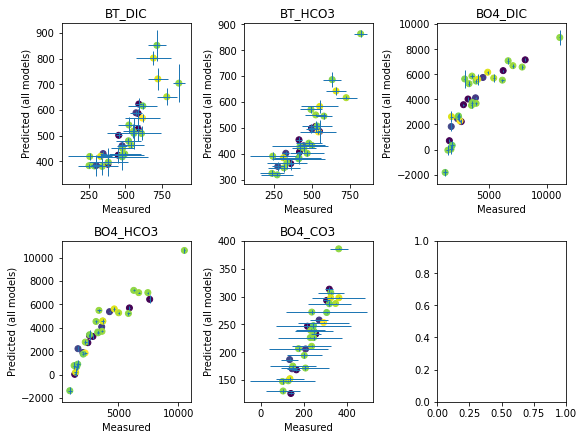

In [22]:
fig, axs = plt.subplots(2, 3, figsize=[8, 6], constrained_layout=True)

for k, ax in zip(brutes.keys(), axs.flat):
    brutes[k].plot_obs_vs_pred(ax=ax, c=dat[('Measured', '[B]sw')])
    ax.set_title(k)
    ax.set_aspect('auto')

## Model Taylor Diagrams

In [23]:
# Convert KB to B/Ca for all models

pred_kb2bca = {}

for b in ['BT', 'BO4']:
    for c in ['DIC', 'HCO3', 'CO3']:
        if b == 'BT' and c == 'CO3':
            continue
        ratio = f'{b}_{c}'
        print(ratio)
        kb_denom = (dat.loc[:, ('csys_mid', b)] / dat.loc[:, ('csys_mid', c)]).values        
        pred_kb2bca[ratio] = brutes[ratio].pred_all * kb_denom
        
#         candidates = dat.loc[:, jextras]
#         y = y0 / 
#         brutes[ratio] = bf.Brute(X=candidates.values, y=y, w=w, varnames=[c[1] for c in candidates.columns], max_interaction_order=0, Scaler=StandardScaler)
#         _ = brutes[ratio].evaluate_polynomials()

BT_DIC
BT_HCO3
BO4_DIC
BO4_HCO3
BO4_CO3


In [106]:
markers = {
    "BT_DIC": "o",
    "BT_HCO3": "s",
    "BO4_DIC": "<",
    "BO4_HCO3": ">",
    "BO4_CO3": "v",
}

labels = {
    "BT_DIC": "$B_T / DIC$",
    "BT_HCO3": "$B_T / HCO_3^-$",
    "BO4_DIC": "$B(OH)_4^- / DIC$",
    "BO4_HCO3": "$B(OH)_4^- / HCO_3^-$",
    "BO4_CO3": "$B(OH)_4^- / CO_3^{2-}$",
}

In [111]:
from b_funks.taylor_diag import Taylor_diag, make_Taylor_axis
from matplotlib.colors import Normalize

In [124]:
previous_models = fit_data_with_previous_models(dat)

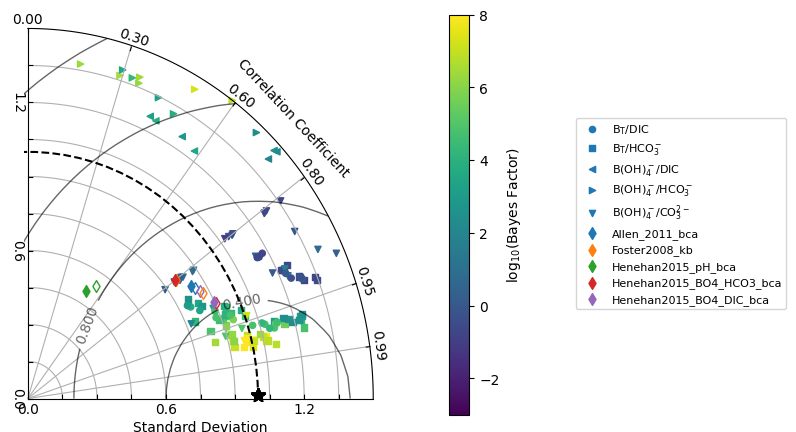

In [126]:
fig, ax = make_Taylor_axis(1.5, figsize=[10, 5])
# plot all brute models
vmin=-3
vmax=8
for k,v in pred_kb2bca.items():
    Taylor_diag(np.vstack([dat.Measured['B/Caf'].values, v]), ax=ax, st_dev_max=1.5, marker=markers[k], s=20, label=labels[k], c=np.log10(brutes[k].modelfits.metrics.BF0), vmin=vmin, vmax=vmax)

# draw colorbar
cax = fig.add_axes([.55, .1, .02, .8])
fig.colorbar(plt.cm.ScalarMappable(Normalize(vmin=vmin, vmax=vmax)), cax=cax, label='$log_{10}$(Bayes Factor)')

# plot other bros

for k, v in previous_models['preds_all_data'].items():
    p = Taylor_diag(np.vstack([previous_models['ydata_all'][k], v]), ax=ax, label=k, marker='d', zorder=5)
    Taylor_diag(np.vstack([previous_models['ydata_training_conditions'][k], previous_models['preds_training_conditions'][k]]), ax=ax, facecolor=(0,0,0,0), lw=1, marker='d', edgecolor=p.get_facecolor(), zorder=4)

# draw legend
ax.legend(fontsize=8, bbox_to_anchor=[1.55, .1, .4, .8], loc='center left')


Fig 4 the papier?!

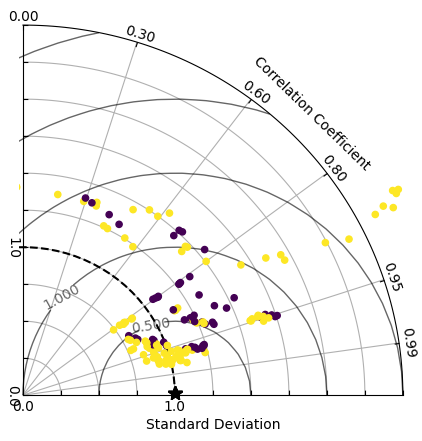

In [32]:
fig, ax = make_Taylor_axis(2.5)

var = 'DIC'

for k,v in pred_kb2bca.items():
    b = brutes[k]
    var_ind = np.concatenate([[0], np.array(b.varnames) == var]).astype(bool)
    var_present = ~b.modelfits.coefs.isnull().values[:, var_ind].flatten()  
    
    # plot as present if in denominator
    if var in k:
        var_present = np.ones(b.modelfits.shape[0])
    
    Taylor_diag(np.vstack([dat.Measured['B/Caf'].values, v]), ax=ax, marker='o', s=20, label=k, c=var_present, vmin=0, vmax=1)

fig.set_size_inches(5, 5)
# ax.legend()

In [38]:
b.varnames

['[Ca]sw', '[Mg]sw', 'BT', 'pHtot', 'DIC']

In [119]:
mdict = {
    "BT_DIC": 'o',
    "BT_HCO3": 's',
    "BO4_DIC": 'd',
    "BO4_HCO3": 'v',
    "BO4_CO3": '^',
}

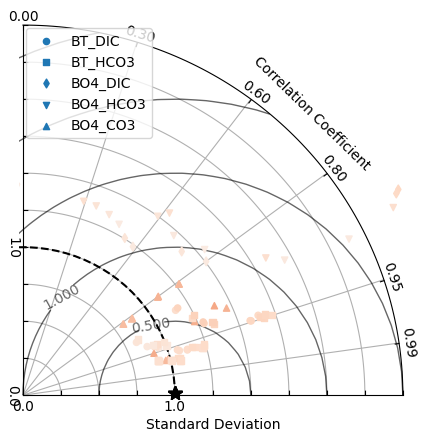

In [146]:
fig, ax = make_Taylor_axis(2.5)

var = '[Mg]sw'

vmin = -1
vmax = 1

for k,v in pred_kb2bca.items():
    b = brutes[k]
    var_ind = np.concatenate([[0], np.array(b.varnames) == var]).astype(bool)
    var_size = b.modelfits.coefs.values[:, var_ind].flatten()
    
    Taylor_diag(np.vstack([dat.Measured['B/Caf'].values, v]), ax=ax, marker=mdict[k], s=20, label=k, c=var_size, vmin=vmin, vmax=vmax, cmap=plt.cm.RdBu_r) # , lw=0.5, edgecolor=(.6,.6,.6))
    
fig.set_size_inches(5, 5)
ax.legend()

Notes: the diagonal points are an artefact... not sure why they're there. Points with nan in the colour variable plot along a 45 degree line!? Only visible when edge-color specified.

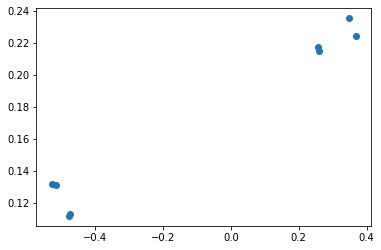

In [148]:
k = 'BT_DIC'
b = brutes[k]

xvar = 'pHtot'
yvar = '[Mg]sw'

xvar_ind = np.concatenate([[0], np.array(b.varnames) == xvar]).astype(bool)
xvar_size = b.modelfits.coefs.values[:, xvar_ind].flatten()

yvar_ind = np.concatenate([[0], np.array(b.varnames) == yvar]).astype(bool)
yvar_size = b.modelfits.coefs.values[:, yvar_ind].flatten()

plt.scatter(xvar_size, yvar_size)

(array([4., 4., 0., 0., 0., 0., 0., 1., 4., 3.]),
 array([-0.67453299, -0.57022806, -0.46592312, -0.36161819, -0.25731325,
        -0.15300832, -0.04870338,  0.05560155,  0.15990648,  0.26421142,
         0.36851635]),
 <BarContainer object of 10 artists>)

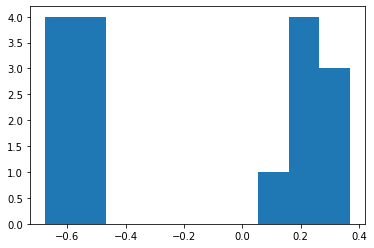

In [149]:
plt.hist(xvar_size)

## 'Best' Model

$$
\frac{B/Ca_{foram}}{[B] / [CO_3^{2-}]} = a [B(OH)_4^-] + b [B] + c [CO_3^{2-}]
$$

### Can this fit others' data (with an offset)?

In [48]:
mdict = {
    'This Study': 'o', 
    'Haynes et al. (2017)': 's', 
    'Allen et al. (2011)': 'd',
#     'Howes et al. (2017)': '*'
}

# variables used in fitting
target_vars = [('csys_mid', 'BO4'), ('csys_mid', 'BT'), ('csys_mid', 'CO3')]

# Kate's datas
ky = (kdat[('Measured', 'B/Caf')] / (kdat[('csys_mid', 'BT')] / kdat[('csys_mid', 'CO3')])).values.reshape(-1,1)
kX = kdat.loc[:, target_vars].values

# calculate scalers based on Kate's data
X_scaler = StandardScaler().fit(kX)
Y_scaler = StandardScaler().fit(ky)

# subset of other peoples' datas
tdat = odat.loc[odat.loc[:, ('Measured', 'who')].isin(mdict)]
tdat = tdat.loc[tdat.csys_mid.pHtot < 8.5]  # remove flyer in Kat's data

y = (tdat[('Measured', 'B/Caf')] / (tdat[('csys_mid', 'BT')] / tdat[('csys_mid', 'CO3')])).values.reshape(-1,1)
X = tdat.loc[:, target_vars].values

# transform others' datas
Xt = X_scaler.transform(X)
yt = Y_scaler.transform(y)

# Fit linear regression
model = LinearRegression(fit_intercept=False)

fit = model.fit(Xt, yt)
yp = fit.predict(Xt)

ypt = Y_scaler.inverse_transform(yp)

# compare to prediction using our best fit params
our_params = df.loc[0, 'coefs'].values[1:].astype(np.float)
our_params = our_params[~np.isnan(our_params)]

kyp = Xt.dot(our_params)
kypt = Y_scaler.inverse_transform(kyp)

fig, ax = plt.subplots()
ax.scatter(y, ypt, label="Best fit to others' data")
ax.scatter(y, kypt, label="Parameters from our best fit")

lim = ax.get_xlim()
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.plot(lim, lim, ls='dashed', c=(0,0,0,0.5))

ax.legend()

ValueError: shapes (74,3) and (4,) not aligned: 3 (dim 1) != 4 (dim 0)

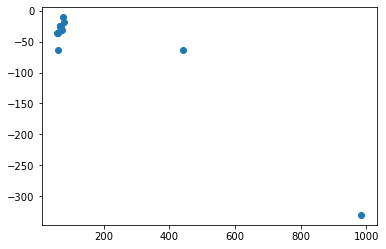

In [46]:
ypbca = ypt.flat * (tdat[('csys_mid', 'BT')] / tdat[('csys_mid', 'CO3')])
kypbca = kypt.flat * (tdat[('csys_mid', 'BT')] / tdat[('csys_mid', 'CO3')])


plt.scatter(tdat[('Measured', 'B/Caf')], ypbca - kypbca)
# plt.scatter(tdat[('Measured', 'B/Caf')], kypbca)

In [23]:
def c_offset(X, c):
    BCa, BT, CO3 = X 
    # Apply offset to others' B/Ca data
    oBCa = BCa + c
    # Caclulate partitioning
    return Y_scaler.transform((oBCa / (BT / CO3)).reshape(-1, 1))[:,0]

def m_offset(X, m):
    BCa, BT, CO3 = X 
    # Apply offset to others' B/Ca data
    oBCa = BCa * m
    # Caclulate partitioning
    return Y_scaler.transform((oBCa / (BT / CO3)).reshape(-1, 1))[:,0]

def cm_offset(X, c, m):
    BCa, BT, CO3 = X 
    # Apply offset to others' B/Ca data
    oBCa = c + BCa * m
    # Caclulate partitioning
    return Y_scaler.transform((oBCa / (BT / CO3)).reshape(-1, 1))[:,0]

In [24]:
Xu = tdat[('Measured', 'B/Caf')].values, tdat[('csys_mid', 'BT')].values, tdat[('csys_mid', 'CO3')].values

# constant offset
pc, covc = opt.curve_fit(c_offset, Xu, kyp.flat)
ypc = Y_scaler.inverse_transform(c_offset(Xu, *pc))

# multiplicative offset
pm, covm = opt.curve_fit(m_offset, Xu, kyp.flat)
ypm = Y_scaler.inverse_transform(m_offset(Xu, *pm))

# both offsets
pcm, covcm = opt.curve_fit(cm_offset, Xu, kyp.flat)
ypcm = Y_scaler.inverse_transform(cm_offset(Xu, *pcm))

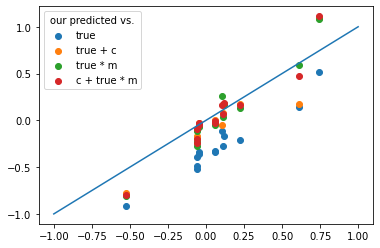

In [25]:
fig, ax = plt.subplots(1, 1)
ax.scatter(kyp, yt, label='true')
ax.scatter(kyp, c_offset(Xu, pc),  label='true + c')
ax.scatter(kyp, m_offset(Xu, pm), label='true * m')
ax.scatter(kyp, cm_offset(Xu, *pcm),  label='c + true * m')

lim = [-1., 1.]
ax.plot(lim, lim)
ax.legend(title='our predicted vs.')

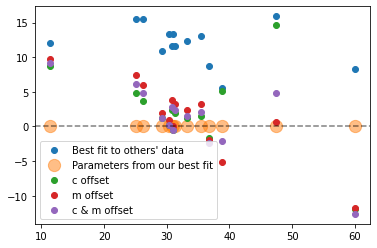

In [161]:
fig, ax = plt.subplots()
ax.scatter(y, kypt - ypt.flat, label="Best fit to others' data")
ax.scatter(y.flat, kypt - kypt, label="Parameters from our best fit", s=150, alpha=0.5)

ax.scatter(y, kypt - ypc, label="c offset")
ax.scatter(y, kypt - ypm, label="m offset")
ax.scatter(y, kypt - ypcm, label="c & m offset")

# lim = ax.get_xlim()
# ax.set_xlim(lim)
# ax.set_ylim(lim)
# ax.plot(lim, lim, ls='dashed', c=(0,0,0,0.5))
ax.axhline(0, ls='dashed', c=(0,0,0,0.5))

ax.legend()

In [205]:
# this isn't quite right - should be applying the offset to the B/Ca data then recalculating partitioning in fitting.

def c_offset(X, c):
    return c + X.dot(our_params)

def m_offset(X, m):
    return p[0] * X.dot(our_params)

def cm_offset(X, c, m):
    return c + m * X.dot(our_params)

In [206]:
# constant offset
pc, covc = opt.curve_fit(c_offset, Xt, yt.flat)
ypc = Y_scaler.inverse_transform(c_offset(Xt, *pc))
# multiplicative offset
pm, covm = opt.curve_fit(m_offset, Xt, yt.flat)
ypm = Y_scaler.inverse_transform(m_offset(Xt, *pm))
# both
pcm, covcm = opt.curve_fit(cm_offset, Xt, yt.flat)
ypcm = Y_scaler.inverse_transform(cm_offset(Xt, *pcm))


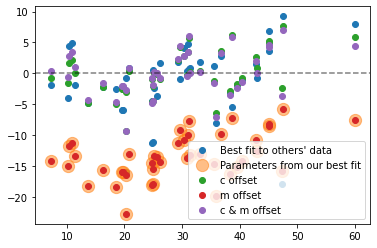

In [207]:
fig, ax = plt.subplots()
ax.scatter(y, y - ypt, label="Best fit to others' data")
ax.scatter(y.flat, y.flat - kypt, label="Parameters from our best fit", s=150, alpha=0.5)

ax.scatter(y, y.flat - ypc, label="c offset")
ax.scatter(y, y.flat - ypm, label="m offset")
ax.scatter(y, y.flat - ypcm, label="c & m offset")

# lim = ax.get_xlim()
# ax.set_xlim(lim)
# ax.set_ylim(lim)
# ax.plot(lim, lim, ls='dashed', c=(0,0,0,0.5))
ax.axhline(0, ls='dashed', c=(0,0,0,0.5))

ax.legend()

## K8 Plot

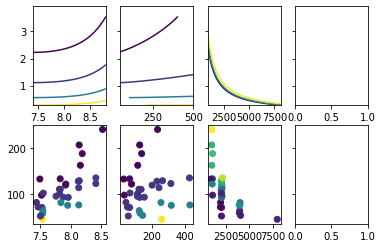

In [77]:
fig, axs = plt.subplots(2, 4, sharex=False, sharey='row')

pH = np.linspace(7.4, 8.8)
DIC = np.linspace(900, 8100)
B = 420 * 5

xpH, xDIC = np.meshgrid(pH, DIC)

sw = cb.CBsys(pHtot=xpH, DIC=xDIC, BT=B, dBT=39.6)

ax = axs[0,0]
cvar = (sw.BT / sw.HCO3)
ax.contour(xpH, cvar, xDIC, [1000, 2000, 4000, 8000])

ax = axs[1,0]
ydat = dat.loc[:, ('Measured', 'B/Caf_corr')]
# ydat = dat.loc[:, ('Measured', 'KB')]
ax.scatter(dat.loc[:, ('csys_mid', 'pHtot')], ydat, c=dat.loc[:, ('csys_mid', 'DIC')])


ax = axs[0,1]
ax.contour(sw.CO3, cvar, xDIC, [1000, 2000, 4000, 8000])
ax.set_xlim(50, 500)

ax = axs[1,1]
ax.scatter(dat.loc[:, ('csys_mid', 'CO3')], ydat, c=dat.loc[:, ('csys_mid', 'DIC')])

ax = axs[0, 2]
ax.contour(xDIC, cvar, xpH, [7.6, 8, 8.4])

ax = axs[1,2]
ax.scatter(dat.loc[:, ('csys_mid', 'DIC')], ydat, c=dat.loc[:, ('csys_mid', 'pHtot')])


## Shambling Ground:

In [ ]:
# b.varnames

$$
B/Ca = a [CO3] + b \frac{B}{HCO3}
$$

In [ ]:
nmod = 1
# b = brutes[df.loc[nmod, 'r'][0]]
b = brutes

b.predict()
b.plot_obs_vs_pred()
plt.scatter(b.y_orig, b.pred_all[0, :], color='C1')

xlim = plt.gca().get_xlim()
plt.xlim(xlim)
plt.ylim(xlim)
plt.plot(xlim, xlim)

In [ ]:
b.modelfits

In [ ]:
dat.columns.shape

In [ ]:
resid = b.pred_all[0] - b.y_orig.T

nvar = b.X_orig.shape[1]

fig, axs = plt.subplots(nvar//2, 2, figsize=[nvar * 2.5, 6])

for i, ax in enumerate(axs.flat):
    ax.scatter(b.X_orig[:, i], resid, c=dat.loc[:, cvar])
    ax.set_xlabel(b.varnames[i])
    
fig.tight_layout()

In [ ]:
resid = b.pred_all[0] - b.y_orig.T

nvar = b.X_orig.shape[1]

fig, axs = plt.subplots(8, 8, figsize=[16,16])

for i, ax in enumerate(axs.flat):
    if i >= dat.shape[1]:
        continue
    if dat.dtypes[i] == 'O':
        continue
    ax.scatter(dat.loc[:, dat.columns[i]], resid)
    ax.set_xlabel(', '.join(dat.columns[i]))
    
fig.tight_layout()

In [ ]:
plt.scatter(dat.loc[:, ('csys_mid', 'CO3')], dat.loc[:, ('Measured', '[Ca]sw')], c=dat.loc[:, ('csys_mid', 'Omega')])
plt.colorbar()

## Pull this model out, fit it and look at the residuals!

In [ ]:
dat.Measured.columns

In [ ]:
plt.rcParams['figure.dpi'] = 150

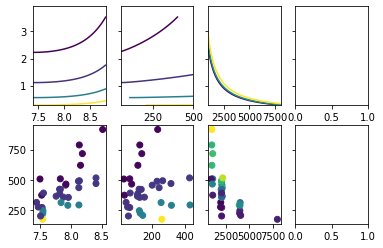

In [65]:
import cbsyst as cb

fig, axs = plt.subplots(2, 4, sharex=False, sharey='row')

pH = np.linspace(7.4, 8.8)
DIC = np.linspace(900, 8100)
B = 420 * 5

xpH, xDIC = np.meshgrid(pH, DIC)

sw = cb.CBsys(pHtot=xpH, DIC=xDIC, BT=B, dBT=39.6)

ax = axs[0,0]
cvar = (sw.BT / sw.HCO3)
ax.contour(xpH, cvar, xDIC, [1000, 2000, 4000, 8000])

ax = axs[1,0]
ydat = dat.loc[:, ('Measured', 'B/Caf')] / (dat.loc[:, ('Measured', '[B]sw')] / dat.loc[:, ('Measured', '[B]sw')].mean() )#/ (dat.loc[:, ('Measured', 'B umol/kg')] / dat.loc[:, ('csys_mid', 'HCO3')])
ax.scatter(dat.loc[:, ('csys_mid', 'pHtot')], ydat, c=dat.loc[:, ('csys_mid', 'DIC')])


ax = axs[0,1]
ax.contour(sw.CO3, cvar, xDIC, [1000, 2000, 4000, 8000])
ax.set_xlim(50, 500)

ax = axs[1,1]
ax.scatter(dat.loc[:, ('csys_mid', 'CO3')], ydat, c=dat.loc[:, ('csys_mid', 'DIC')])

ax = axs[0, 2]
ax.contour(xDIC, cvar, xpH, [7.6, 8, 8.4])

ax = axs[1,2]
ax.scatter(dat.loc[:, ('csys_mid', 'DIC')], ydat, c=dat.loc[:, ('csys_mid', 'pHtot')])


In [66]:
# cvar = ('Measured', '[Ca]sw')
# cvar = ('Measured', '[Mg]sw')
# cvar = ('csys_mid', 'Omega')
# cvar = ('csys_mid', 'CO3')
cvar = ('csys_mid', 'DIC')
# cvar = ('Measured', 'B umol/kg')

# bca_norm = dat.loc[:, ('Measured', 'B/Caf')] #/ (dat.loc[:, ('Measured', 'B umol/kg')] / dat.loc[:, ('Measured', 'B umol/kg')].mean())
y = dat.loc[:, ('Measured', 'KB')] #/ (dat.loc[:, ('Measured', 'B umol/kg')] / dat.loc[:, ('Measured', 'B umol/kg')].mean())

x = dat.loc[:, ('Measured', 'B umol/kg')] / dat.loc[:, ('csys_mid', 'DIC')]
# x = dat.loc[:, ('csys_mid', 'DIC')]

plt.scatter(x, y, c=dat.loc[:, cvar])

KeyError: ('Measured', 'B umol/kg')

In [ ]:
sdat.csys_mid

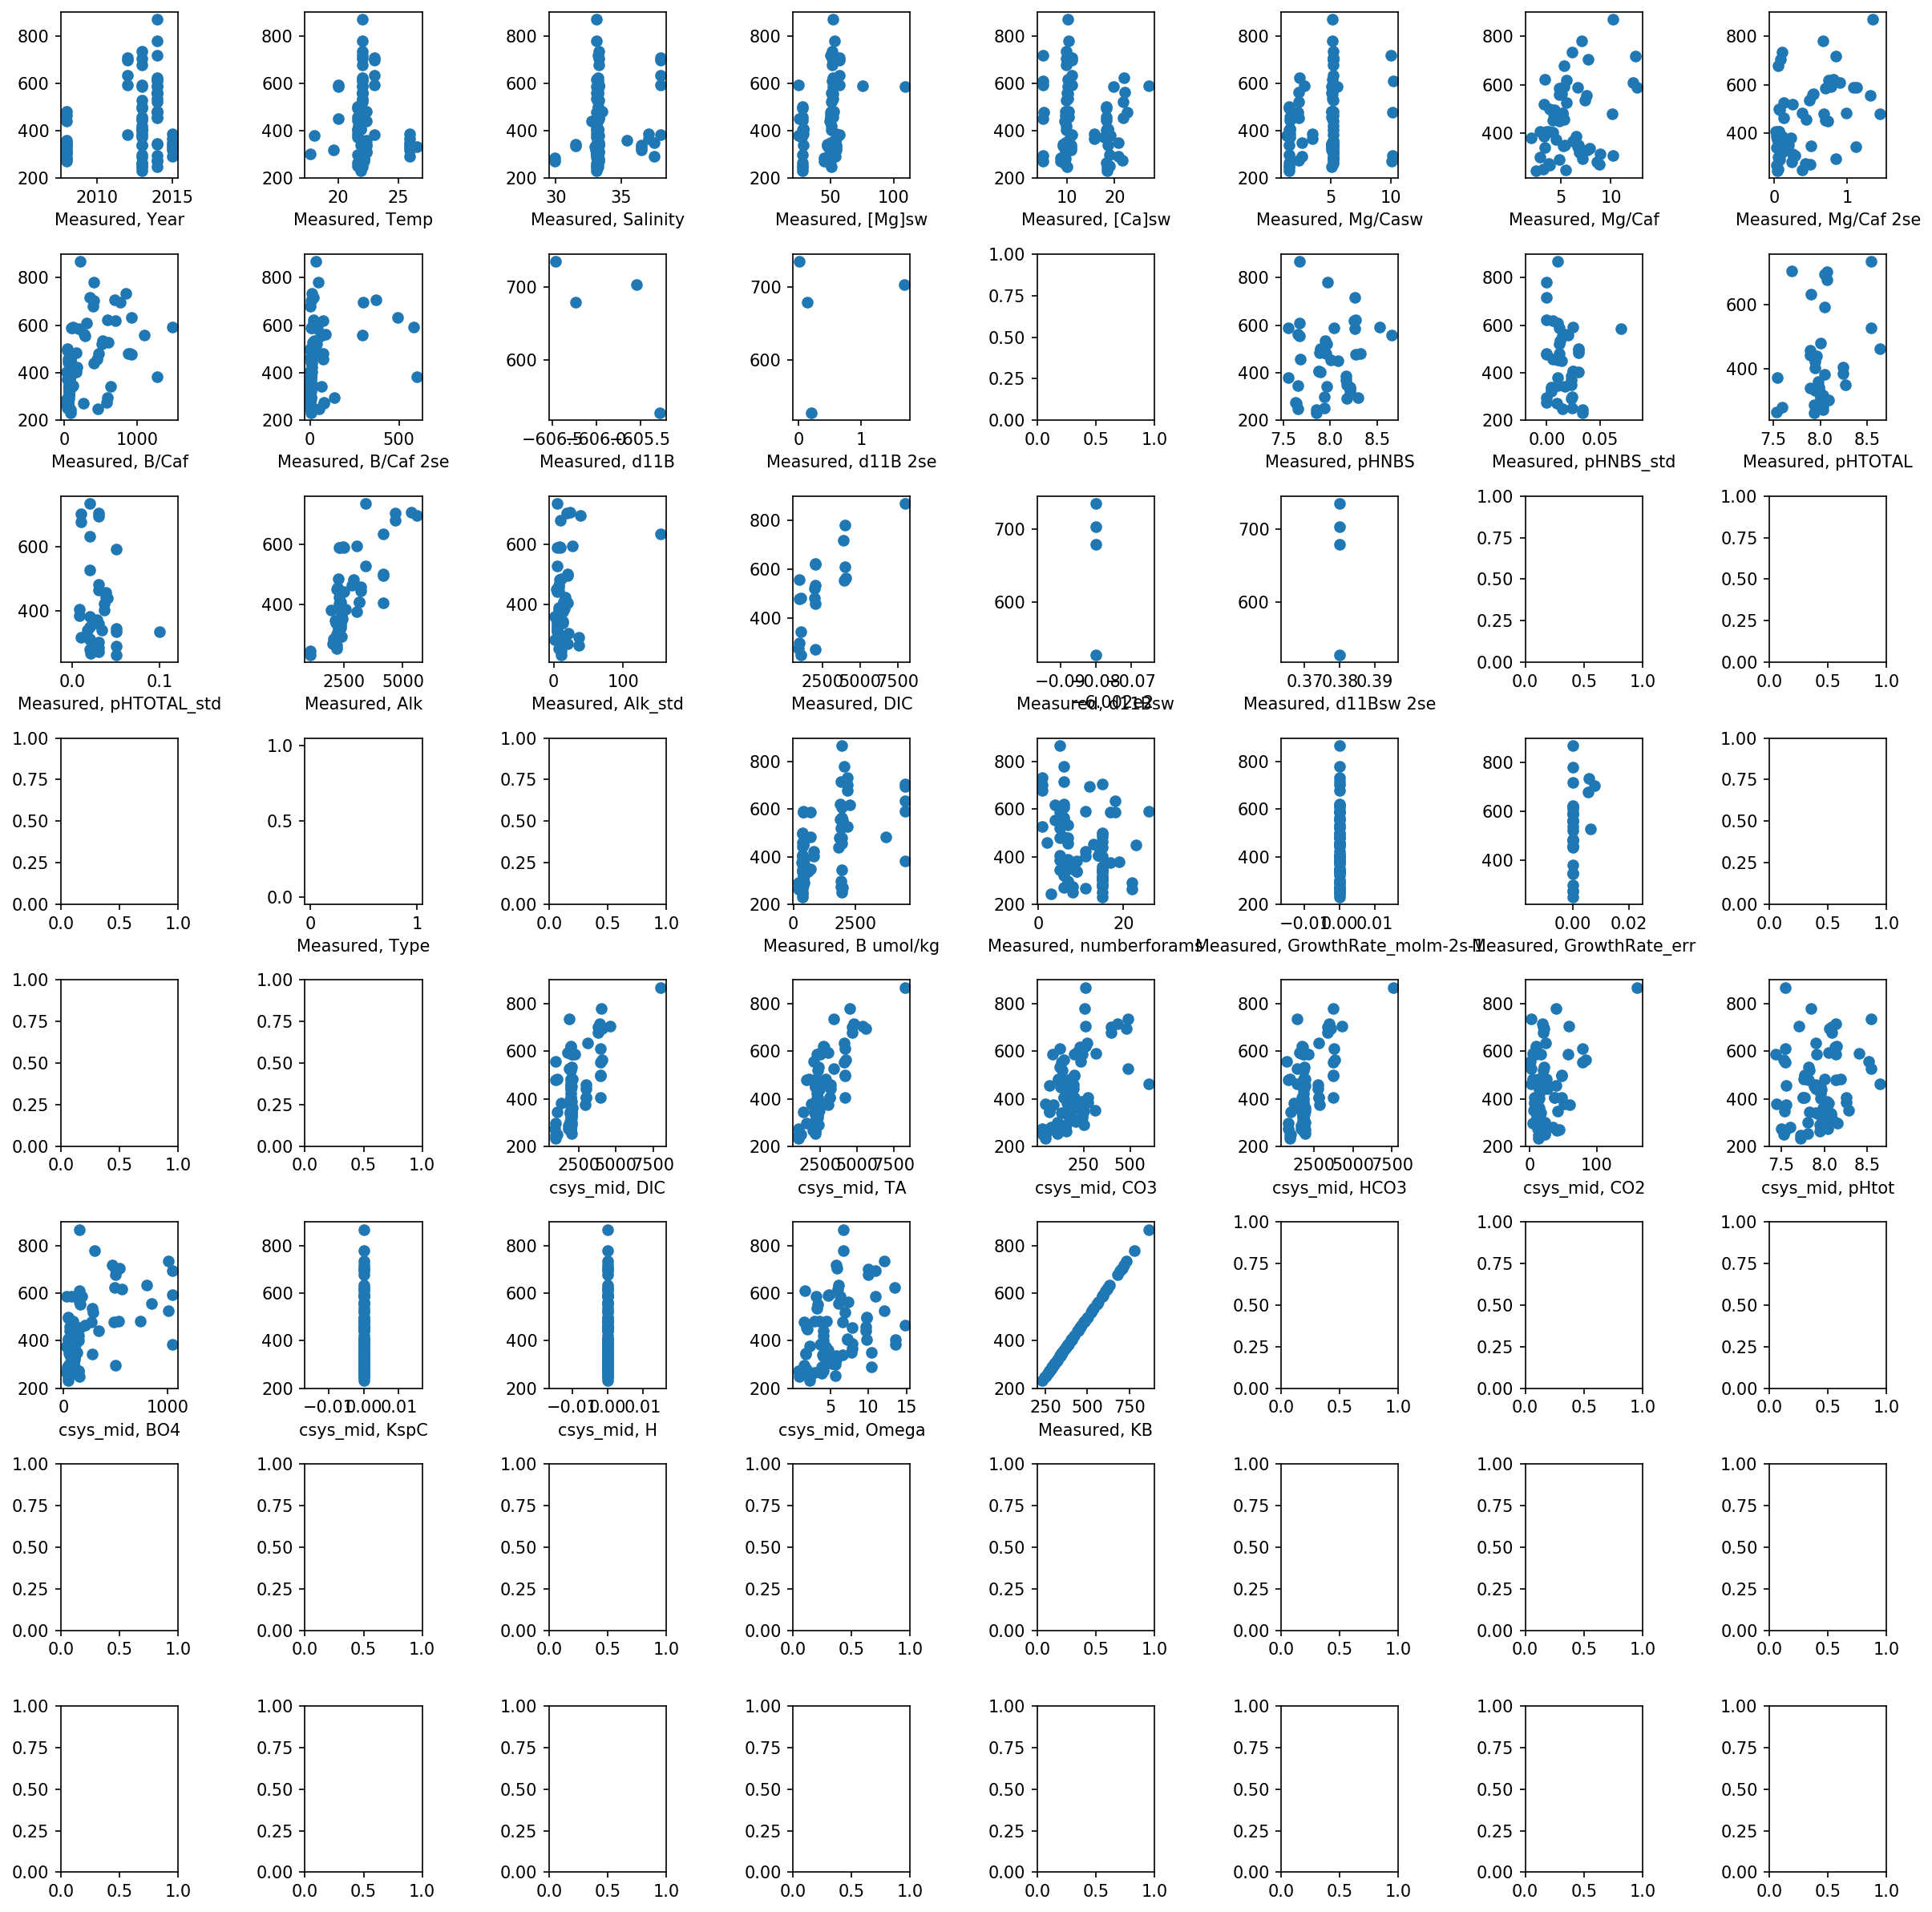

In [222]:
resid = dat.loc[:, ('Measured', 'KB')]

sdat = dat.loc[:, ['Measured', 'csys_mid']]
nvar = b.X_orig.shape[1]

fig, axs = plt.subplots(8, 8, figsize=[16,16])

i = 0
for ax in axs.flat:
    if i >= sdat.shape[1]:
        continue
    if sdat.dtypes[i] == 'O':
        i += 1
        continue
    ax.scatter(sdat.loc[:, sdat.columns[i]], resid)
    ax.set_xlabel(', '.join(sdat.columns[i]))
    i += 1

fig.tight_layout()